In [30]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando as bibliotecas de machine learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [31]:
# Utilizando a função 'read_csv' do Pandas para ler o arquivo CSV "zoo.data"
# e armazená-lo em um DataFrame chamado 'dataset'.

dataset = pd.read_csv("zoo.data")

In [32]:
print(dataset)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [33]:
# O método 'describe()' no DataFrame 'dataset' gera estatísticas descritivas.
# Esse método fornece informações resumidas, como média, desvio padrão, mínimo, máximo e quartis,
# para todas as colunas numéricas do conjunto de dados.

dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


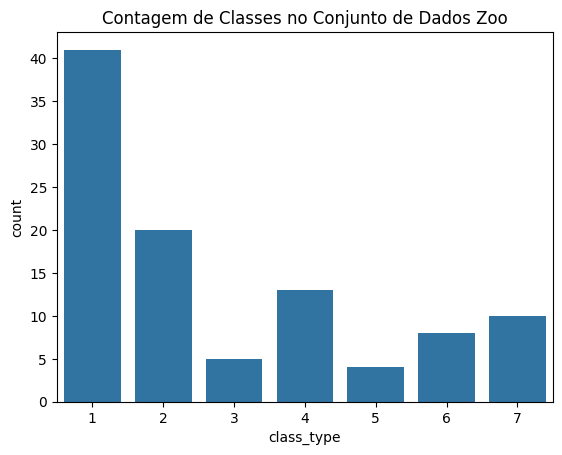

In [34]:
# grafico de barras para entender a distribuicao de classes e carecteristicas
sns.countplot(x= 'class_type',data=dataset)
plt.title('Contagem de Classes no Conjunto de Dados Zoo')
plt.show()

([<matplotlib.patches.Wedge at 0x2d1855af230>,
 [Text(0.32033618930298535, 1.0523234891528566, 'Mamiferos'),
  Text(-1.0994679108383114, -0.03420983830477962, 'Aves'),
  Text(-0.5400934770783005, -0.958279205668928, 'Reptils'),
  Text(0.2208878161026599, -1.0775938811525414, 'Peixes'),
  Text(0.7594620467872197, -0.7957495834053367, 'Anfíbios'),
  Text(1.0112883545147722, -0.4327769217770337, 'Insetos'),
  Text(1.0914968630637232, -0.13650860017615118, 'Invertebrados')],
 [Text(0.17472883052890106, 0.5739946304470126, '40.59%'),
  Text(-0.5997097695481698, -0.018659911802607062, '19.80%'),
  Text(-0.2945964420427093, -0.5226977485466879, '12.87%'),
  Text(0.12048426332872357, -0.5877784806286589, '9.90%'),
  Text(0.4142520255203016, -0.4340452273120018, '7.92%'),
  Text(0.5516118297353302, -0.23606013915110927, '4.95%'),
  Text(0.5953619253074852, -0.07445923645971882, '3.96%')])

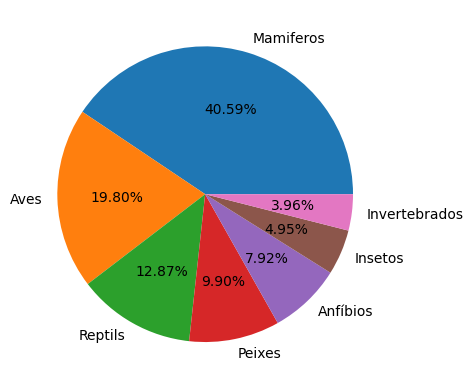

In [35]:
# Definindo os rótulos para as fatias do gráfico de pizza.
labels = 'Mamiferos','Aves','Reptils','Peixes','Anfíbios','Insetos','Invertebrados'
# Definindo os tamanhos (ou valores) correspondentes a cada fatia do gráfico de pizza.
sizes = [41, 20, 5, 13, 4, 8, 10]

# Criando uma figura (um espaço para gráficos) e um eixo (uma área dentro da figura) usando a Matplotlib.
fig, ax = plt.subplots()

# faz a contagem de valores únicos na coluna "class" do DataFrame 'dataset' usando 'value_counts()'.
x = dataset["class_type"].value_counts()

#Gerando um gráfico de pizza (pie chart) com os tamanhos e rótulos especificados.
# 'autopct' define o formato de exibição das porcentagens nas fatias como dois decimais.
plt.pie(x, labels=labels,autopct='%.2f%%')

In [36]:
#Remove a coluna 'animal_name'
dataset = dataset.drop('animal_name', axis=1)

# Carrega os valores de X e y do meu dataset.

# Remove a coluna 'class' do DataFrame 'dataset' e atribui o resultado a 'X'.
X = dataset.drop(['class_type'], axis=1)

# Imprime o DataFrame 'X', que agora contém os dados de características (ou atributos) do conjunto de dados.
print(X)

# Cria uma série 'y' que contém a coluna 'class' do DataFrame 'dataset'.
y = dataset['class_type']

# Imprime a série 'y', que contém os rótulos (ou classes) associados aos dados de 'X'.
print(y)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [37]:
# Aplicar one-hot encoding nas features categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X.select_dtypes(include='object'))

# Adicionar as colunas one-hot ao DataFrame original
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.select_dtypes(include='object').columns))
X = pd.concat([X.drop(X.select_dtypes(include='object').columns, axis=1), X_encoded_df], axis=1)

In [38]:
# Dividir os dados em treino e teste

# A função 'train_test_split' da biblioteca scikit-learn é usada para dividir os dados em conjuntos de treinamento e teste.

# 'X' representa as características (atributos) do conjunto de dados.
# 'y' representa os rótulos (classes) associados às amostras.

# 'test_size=0.2' indica que 2% dos dados serão usados como conjunto de teste, enquanto 75% serão usados como conjunto de treinamento.

# 'random_state=45' é uma semente aleatória que garante que a divisão seja reproduzível, ou seja, os mesmos resultados serão obtidos sempre que esse código for executado com a mesma semente.

# O resultado da função 'train_test_split' é a divisão dos dados em quatro partes:
# 'X_train': Conjunto de treinamento de características.
# 'X_test': Conjunto de teste de características.
# 'y_train': Conjunto de treinamento de rótulos.
# 'y_test': Conjunto de teste de rótulos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=48)

In [39]:
# Criar um modelo SVM com um kernel específico
svm_model = SVC(kernel='rbf', gamma ='scale')

In [40]:
# Treinar o modelo SVM usando os dados de treinamento.
# 'svm_modelo' é o objeto do modelo SVM que você criou anteriormente.
# 'X_train' é o conjunto de treinamento de características, que contém as amostras usadas para treinar o modelo.
# 'y_train' é o conjunto de treinamento de rótulos (classes), que contém as classes correspondentes às amostras em 'X_train'.

svm_model.fit(X_train, y_train)

SVC()

In [41]:
# Fazer previsões usando o modelo SVM treinado.
# 'svm_modelo' é o objeto do modelo SVM que foi treinado previamente.
# 'X_test' é o conjunto de teste de características, que contém as amostras para as quais você deseja fazer previsões.
# 'y_pred' será o resultado das previsões feitas pelo modelo para as amostras em 'X_test'.
y_predicao = svm_model.predict(X_test)

In [42]:
#Acurácia (Accuracy): Mede a proporção de previsões corretas.
accuracy1 = accuracy_score(y_test, y_predicao)
print(f'Acurácia: {accuracy1:.2f}')

#Matriz de Confusão (Confusion Matrix): Mostra o número de verdadeiros positivos, 
#verdadeiros negativos, falsos positivos e falsos negativos.
cm = confusion_matrix(y_test, y_predicao)
print('Matriz de Confusão:')
print(cm)

#Relatório de Classificação (Classification Report): Fornece uma visão geral das métricas de classificação, 
#incluindo precisão, recall e F1-score para cada classe.
report = classification_report(y_test, y_predicao,zero_division=1)
print('Relatório de Classificação:')
print(report)

Acurácia: 0.90
Matriz de Confusão:
[[20  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 0  1  0  2  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 2  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  5]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        20
           2       0.92      1.00      0.96        12
           3       1.00      0.00      0.00         3
           4       0.71      1.00      0.83         5
           5       1.00      0.00      0.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5

    accuracy                           0.90        51
   macro avg       0.94      0.71      0.68        51
weighted avg       0.92      0.90      0.86        51



In [43]:
# Criar modelo KNN para classificação
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [44]:
#Treinar o modelo KNN usando os dados de treinamento
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# Fazer previsões
y_pred_classifier = knn_classifier.predict(X_test)

In [46]:
# #Acurácia (Accuracy): Mede a proporção de previsões corretas
accuracy2 = accuracy_score(y_test, y_pred_classifier)
print(f'Acurácia: {accuracy2:.2f}')

#Matriz de Confusão (Confusion Matrix): Mostra o número de verdadeiros positivos, 
#verdadeiros negativos, falsos positivos e falsos negativos.
conf_matrix = confusion_matrix(y_test, y_pred_classifier)
print('Matriz de Confusão:')
print(conf_matrix)

#Relatório de Classificação (Classification Report): Fornece uma visão geral das métricas de classificação, 
#incluindo precisão, recall e F1-score para cada classe.
report = classification_report(y_test, y_pred_classifier,zero_division=1)
print('Relatório de Classificação:')
print(report)

Acurácia: 0.76
Matriz de Confusão:
[[18  0  0  2  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 1  0  0  2  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 2  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  2  1  2  0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      1.00      1.00        12
           3       1.00      0.00      0.00         3
           4       0.45      1.00      0.62         5
           5       0.00      0.00      1.00         2
           6       0.67      1.00      0.80         4
           7       1.00      0.00      0.00         5

    accuracy                           0.76        51
   macro avg       0.71      0.56      0.61        51
weighted avg       0.83      0.76      0.74        51



In [47]:
#Criar um modelo Random Forest para classificação
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
#Treinar o modelo Random Forest usando os dados de treinamento
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Fazer previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

In [50]:
# #Acurácia (Accuracy): Mede a proporção de previsões corretas
accuracy3 = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy3:.2f}')

#Matriz de Confusão (Confusion Matrix): Mostra o número de verdadeiros positivos, 
#verdadeiros negativos, falsos positivos e falsos negativos.
conf_ma= confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_ma)

#Relatório de Classificação (Classification Report): Fornece uma visão geral das métricas de classificação, 
#incluindo precisão, recall e F1-score para cada classe.
report = classification_report(y_test, y_pred,zero_division=1)
print('Relatório de Classificação:')
print(report)

Acurácia: 0.92
Matriz de Confusão:
[[20  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 0  1  1  1  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 1  0  0  0  0  0  4]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       0.92      1.00      0.96        12
           3       0.50      0.33      0.40         3
           4       0.83      1.00      0.91         5
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         4
           7       1.00      0.80      0.89         5

    accuracy                           0.92        51
   macro avg       0.89      0.80      0.83        51
weighted avg       0.92      0.92      0.91        51



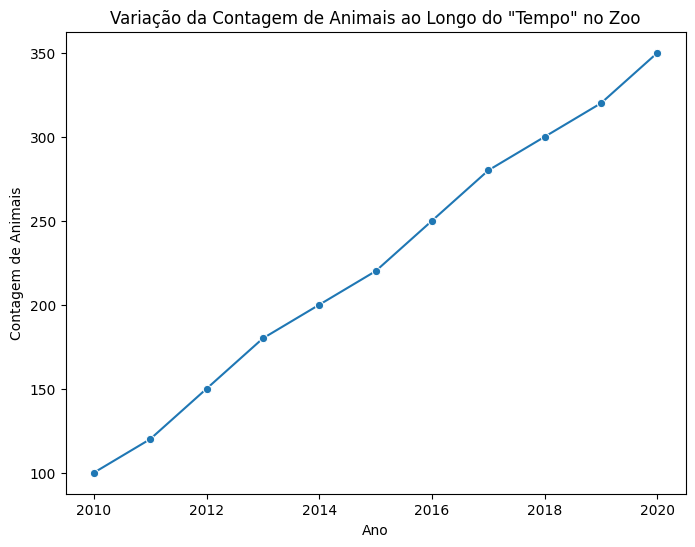

In [52]:
# Criando um conjunto de dados fictício para representar o zoo ao longo do "tempo"
anos = list(range(2010, 2021))
contagem_animais = [100, 120, 150, 180, 200, 220, 250, 280, 300, 320, 350]

df_zoo_tempo = pd.DataFrame({'Ano': anos, 'Contagem_Animais': contagem_animais})

# Criando um gráfico de linha
plt.figure(figsize=(8, 6))
sns.lineplot(x='Ano', y='Contagem_Animais', data=df_zoo_tempo, marker='o')
plt.title('Variação da Contagem de Animais ao Longo do "Tempo" no Zoo')
plt.xlabel('Ano')
plt.ylabel('Contagem de Animais')
plt.show()